# Steps to Do:
    1. DataSet Preparation
    2. Data Preprocessing
    3. Build The Model
    4. Train The Model
    5. Evaluate The Model
    6. Test The Model

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Getting DataSets

In [2]:
train_data_dir='./DataSets/Training'
validation_data_dir='./DataSets/Validating'

In [3]:
for expression in os.listdir(train_data_dir+"/"):
    print(str(len(os.listdir(train_data_dir+"/" + expression))) + " " + expression + " images")

560 Angry images
680 Happy images
616 Neutral images
704 Sad images


In [4]:
for expression in os.listdir(validation_data_dir+"/"):
    print(str(len(os.listdir(validation_data_dir+"/" + expression))) + " " + expression + " images")

248 Angry images
296 Happy images
264 Neutral images
288 Sad images


# Samples of DataSet

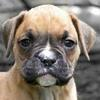

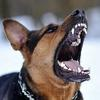

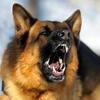

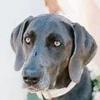

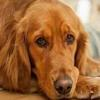

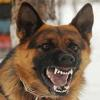

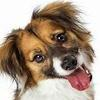

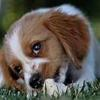

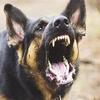

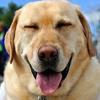

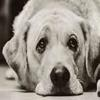

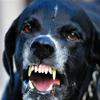

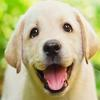

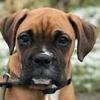

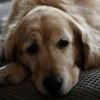

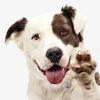

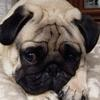

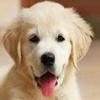

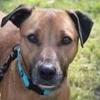

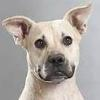

In [5]:
from IPython.display import Image, display
os.chdir("./DataSets/Sample")
img=[]
for file in os.listdir("./DataSets/Sample"):
    img.append(file)
for i in img:
    display(Image(filename=i))

# Image Augmentation

In [6]:
num_classes=4
img_rows,img_cols=100,100
batch_size=16

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    width_shift_range=0.4,
    height_shift_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
 train_data_dir,
 color_mode='grayscale',
 target_size=(img_rows,img_cols),
 batch_size=batch_size,
 class_mode='categorical',
 shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
 validation_data_dir,
 color_mode='grayscale',
 target_size=(img_rows,img_cols),
 batch_size=batch_size,
 class_mode='categorical',
 shuffle=True)

Found 2560 images belonging to 4 classes.
Found 1096 images belonging to 4 classes.


# Buliding Model

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer="he_normal",
                 input_shape = (img_rows, img_cols, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding = "same", kernel_initializer="he_normal", 
                 input_shape = (img_rows, img_cols, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, kernel_initializer="he_normal"))
model.add(Activation("softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 100, 100, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0

In [9]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [14]:
checkpoint = ModelCheckpoint('DogEmotionDetectionModel.h5',
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', 
                              factor = 0.2, 
                              patience = 3, 
                              verbose = 1, 
                              min_delta = 0.0001)
callbacks = [checkpoint]

In [13]:
model.compile(loss='categorical_crossentropy',
 optimizer = Adam(lr=0.001),
 metrics=['accuracy'])

nb_train_samples = 2560
nb_validation_samples = 1096
epochs=100


In [16]:
history=model.fit(
 train_generator,
 steps_per_epoch=nb_train_samples//batch_size,
 epochs=epochs,
 callbacks=callbacks,
 validation_data=validation_generator,
 validation_steps=nb_validation_samples//batch_size)

Epoch 1/100
160/160 [==============================] - 148s 921ms/step - loss: 2.0335 - accuracy: 0.2803 - val_loss: 2.1970 - val_accuracy: 0.1719

Epoch 00001: val_loss improved from inf to 2.19700, saving model to DogEmotionDetectionModel_9.h5
Epoch 2/100
160/160 [==============================] - 151s 944ms/step - loss: 1.8042 - accuracy: 0.2512 - val_loss: 1.3041 - val_accuracy: 0.4182

Epoch 00002: val_loss improved from 2.19700 to 1.30414, saving model to DogEmotionDetectionModel_9.h5
Epoch 3/100
160/160 [==============================] - 152s 947ms/step - loss: 1.5781 - accuracy: 0.2885 - val_loss: 1.3135 - val_accuracy: 0.3888

Epoch 00003: val_loss did not improve from 1.30414
Epoch 4/100
160/160 [==============================] - 152s 951ms/step - loss: 1.4999 - accuracy: 0.3127 - val_loss: 1.2979 - val_accuracy: 0.4108

Epoch 00004: val_loss improved from 1.30414 to 1.29789, saving model to DogEmotionDetectionModel_9.h5
Epoch 5/100
160/160 [==============================] - 


Epoch 00077: val_loss did not improve from 0.47954
Epoch 78/100
160/160 [==============================] - 92s 572ms/step - loss: 0.6712 - accuracy: 0.7498 - val_loss: 0.7618 - val_accuracy: 0.7050

Epoch 00078: val_loss did not improve from 0.47954
Epoch 79/100
160/160 [==============================] - 91s 570ms/step - loss: 0.6872 - accuracy: 0.7470 - val_loss: 0.6830 - val_accuracy: 0.7574

Epoch 00079: val_loss did not improve from 0.47954
Epoch 80/100
160/160 [==============================] - 91s 569ms/step - loss: 0.7100 - accuracy: 0.7284 - val_loss: 0.6266 - val_accuracy: 0.7619

Epoch 00080: val_loss did not improve from 0.47954
Epoch 81/100
160/160 [==============================] - 92s 573ms/step - loss: 0.6860 - accuracy: 0.7405 - val_loss: 0.5692 - val_accuracy: 0.7803

Epoch 00081: val_loss did not improve from 0.47954
Epoch 82/100
160/160 [==============================] - 90s 562ms/step - loss: 0.6377 - accuracy: 0.7562 - val_loss: 0.6445 - val_accuracy: 0.7537

Epoc

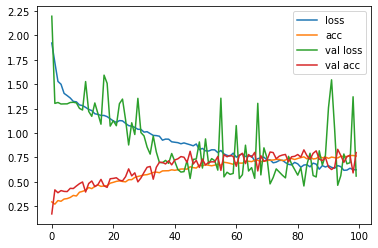

In [17]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [22]:
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())


In [30]:
Y_pred = model.predict(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

In [31]:
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

Confusion Matrix
[[225  19   1   3]
 [ 24 222  39  11]
 [ 34  83  70  77]
 [  8  16  21 243]]


In [32]:
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       Angry       0.77      0.91      0.83       248
       Happy       0.65      0.75      0.70       296
     Neutral       0.53      0.27      0.35       264
         Sad       0.73      0.84      0.78       288

    accuracy                           0.69      1096
   macro avg       0.67      0.69      0.67      1096
weighted avg       0.67      0.69      0.67      1096



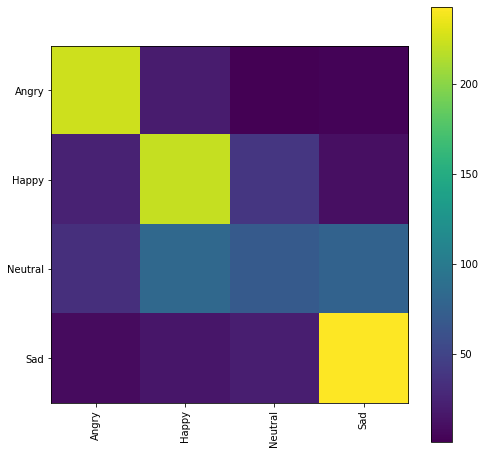

In [33]:
plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

# Loading Model and test it on Sample Datasets

In [27]:
from keras.models import load_model

classifier = load_model('./DogEmotionDetectionModel_5.h5')

In [28]:
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)

Found 1096 images belonging to 4 classes.
{0: 'Angry', 1: 'Happy', 2: 'Neutral', 3: 'Sad'}


In [85]:
from keras.models import load_model
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height),grayscale=True), final_path, path_class

# dimensions of our images
img_width, img_height = 100, 100

# We use a very small learning rate 
classifier.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

files = []
predictions = []
true_labels = []

# predicting images
for i in range(0, 20):
    path = 'C:/Users/rajla/OneDrive/Desktop/SEM 6/DE/DataSets/Testing/' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = classifier.predict_classes(images, batch_size = 16)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    image = cv2.resize(image, None, fx=1, fy=1, interpolation = cv2.INTER_CUBIC)
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [86]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from keras.preprocessing.image import img_to_array

def draw_test(name, pred, im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.imshow(name, expanded_image)


img = cv2.imread("./test.jfif")

gray = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY)
gray=cv2.resize(gray,(100,100), interpolation = cv2.INTER_AREA)
im=gray.astype("float")/255.0
im=img_to_array(im)
im=np.expand_dims(im,axis=0)
preds=classifier.predict(im)[0]
label=class_labels[preds.argmax()]
draw_test("Prediction", label, img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [87]:
import os

os.chdir("./DataSets/Sample")
for file in os.listdir("./DataSets/Sample"):
    img = cv2.imread(file)
    gray = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY)
    gray=cv2.resize(gray,(100,100), interpolation = cv2.INTER_AREA)
    im=gray.astype("float")/255.0
    im=image.img_to_array(im)
    im=np.expand_dims(im,axis=0)
    preds=classifier.predict(im)[0]
    label=class_labels[preds.argmax()]
    draw_test("Prediction",label, img)
    cv2.waitKey(0)
cv2.destroyAllWindows()